In [2]:
import pandas as pd

emendas = pd.read_excel('RP-9 Por cidade 2020 e 2021 .xlsx', skiprows=1)
indice_centrao_2022 = pd.read_csv('indice_centrao_2022.csv')


In [3]:
emendas

,Unnamed: 0,Cidade,Soma de Pago,Soma de Empenhado,Soma de RP Pago
0,NaN,BRASILIA,"R$ 3.011.895.127,11","R$ 4.049.292.756,65","R$ 425.968.008,38"
1,NaN,RIO DE JANEIRO,"R$ 382.740.296,77","R$ 921.433.871,62","R$ 179.416.393,37"
2,NaN,BELO HORIZONTE,"R$ 350.490.363,75","R$ 655.614.243,44","R$ 120.398.926,77"
3,NaN,SAO PAULO,"R$ 383.660.788,01","R$ 620.028.461,81","R$ 151.876.996,59"
4,NaN,SALVADOR,"R$ 286.321.244,91","R$ 582.278.028,77","R$ 93.701.397,56"
...,...,...,...,...,...
5043,NaN,SAUBARA,"R$ 1.000,00","R$ 1.000,00",R$ -
5044,NaN,ARROIO DO PADRE,"R$ 648,66","R$ 648,66",R$ -
5045,NaN,GAUCHA DO NORTE,"R$ 120,00","R$ 360,00","R$ 240,00"
5046,NaN,MARTINOPOLE,R$ -,R$ -,R$ -


In [25]:
from unidecode import unidecode

indice_centrao_2022['NM_MUNICIPIO'] = indice_centrao_2022['NM_MUNICIPIO'].apply(unidecode)

merged = pd.merge(emendas, indice_centrao_2022, left_on='Cidade', right_on='NM_MUNICIPIO', how='left')

In [64]:
merged
merged['Soma de RP Pago'] = merged['Soma de RP Pago'].replace({'R\$ ': '', '\.': '', ',': '.', "-":None}, regex=True).astype(float)
merged['RP empenhado'] = merged['Soma de Empenhado'].replace({'R\$ ': '', '\.': '', ',': '.', "-":None}, regex=True).astype(float)
merged['Soma pago'] = merged['Soma de Pago'].replace({'R\$ ': '', '\.': '', ',': '.', "-":None}, regex=True).astype(float)

In [32]:
merged

,Unnamed: 0,Cidade,Soma de Pago,Soma de Empenhado,Soma de RP Pago,QT_VOTOS_NOMINAIS,NM_MUNICIPIO,SG_UF
0,NaN,BRASILIA,"R$ 3.011.895.127,11","R$ 4.049.292.756,65",4.259680e+08,0.248019,BRASILIA,DF
1,NaN,RIO DE JANEIRO,"R$ 382.740.296,77","R$ 921.433.871,62",1.794164e+08,0.213493,RIO DE JANEIRO,RJ
2,NaN,BELO HORIZONTE,"R$ 350.490.363,75","R$ 655.614.243,44",1.203989e+08,0.154803,BELO HORIZONTE,MG
3,NaN,SAO PAULO,"R$ 383.660.788,01","R$ 620.028.461,81",1.518770e+08,0.185173,SAO PAULO,SP
4,NaN,SALVADOR,"R$ 286.321.244,91","R$ 582.278.028,77",9.370140e+07,0.156414,SALVADOR,BA
...,...,...,...,...,...,...,...,...
5323,NaN,SAUBARA,"R$ 1.000,00","R$ 1.000,00",NaN,0.328730,SAUBARA,BA
5324,NaN,ARROIO DO PADRE,"R$ 648,66","R$ 648,66",NaN,0.346648,ARROIO DO PADRE,RS
5325,NaN,GAUCHA DO NORTE,"R$ 120,00","R$ 360,00",2.400000e+02,0.223881,GAUCHA DO NORTE,MT
5326,NaN,MARTINOPOLE,R$ -,R$ -,NaN,0.866684,MARTINOPOLE,CE


In [46]:
pib_2021

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
61255,2021,1,Norte,11,RO,Rondônia,1100015,ALTA FLORESTA D'OESTE,NaN,1102,...,2.784719e+04,1.724354e+05,1.731216e+05,6.848729e+05,4.959640e+04,7.344693e+05,32619.88,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária","Agricultura, inclusive apoio à agricultura e a..."
61256,2021,1,Norte,11,RO,Rondônia,1100023,ARIQUEMES,NaN,1102,...,4.063291e+05,1.307930e+06,7.823062e+05,2.789566e+06,4.201954e+05,3.209761e+06,28878.27,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
61257,2021,1,Norte,11,RO,Rondônia,1100031,CABIXI,NaN,1102,...,8.115023e+03,3.586537e+04,4.657925e+04,2.272189e+05,1.119268e+04,2.384116e+05,47051.83,"Agricultura, inclusive apoio à agricultura e a...","Pecuária, inclusive apoio à pecuária","Administração, defesa, educação e saúde públic..."
61258,2021,1,Norte,11,RO,Rondônia,1100049,CACOAL,NaN,1102,...,2.367224e+05,1.200630e+06,6.291094e+05,2.407776e+06,3.846066e+05,2.792383e+06,32313.26,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...
61259,2021,1,Norte,11,RO,Rondônia,1100056,CEREJEIRAS,NaN,1102,...,2.741234e+04,3.086660e+05,1.233646e+05,6.111334e+05,1.319039e+05,7.430374e+05,46185.81,Comércio e reparação de veículos automotores e...,Demais serviços,"Administração, defesa, educação e saúde públic..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66820,2021,5,Centro-oeste,52,GO,Goiás,5222005,VIANOPOLIS,NaN,5205,...,4.389325e+04,2.564195e+05,7.572432e+04,7.919116e+05,6.605620e+04,8.579678e+05,60900.61,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Comércio e reparação de veículos automotores e...
66821,2021,5,Centro-oeste,52,GO,Goiás,5222054,VICENTINOPOLIS,NaN,5205,...,8.766436e+04,1.133146e+05,5.262750e+04,4.482734e+05,3.189978e+04,4.801731e+05,53340.72,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Indústrias de transformação
66822,2021,5,Centro-oeste,52,GO,Goiás,5222203,VILA BOA,Região Integrada de Desenvolvimento do Distrit...,5204,...,3.027519e+04,4.030499e+04,3.671192e+04,1.657065e+05,1.419232e+04,1.798988e+05,27886.97,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços
66823,2021,5,Centro-oeste,52,GO,Goiás,5222302,VILA PROPICIO,Região Integrada de Desenvolvimento do Distrit...,5204,...,5.734158e+04,4.672394e+04,3.313335e+04,2.951483e+05,1.286475e+04,3.080130e+05,51845.31,"Agricultura, inclusive apoio à agricultura e a...",Indústrias extrativas,Demais serviços


In [ ]:
pib_2021 = pd.read_excel('PIB dos Municípios - base de dados 2010-2021.xlsx',)
pib_2021 = pib_2021[pib_2021['Ano']==2021]


KeyboardInterrupt: 

In [50]:
pib_2021['Nome do Município'] = pib_2021['Nome do Município'].apply(unidecode).str.upper()
pib_2021['Pop'] = pib_2021['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']*1000 / pib_2021['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']
pib_2021['Pop'] = pib_2021['Pop'].astype(int)

In [51]:
pop_2021 = pib_2021[['Nome do Município', 'Pop']].copy()

In [65]:
pop_2021
merged_pop = pd.merge(merged, pop_2021, left_on='Cidade', right_on='Nome do Município', how='left')
merged_pop

,Unnamed: 0,Cidade,Soma de Pago,Soma de Empenhado,Soma de RP Pago,QT_VOTOS_NOMINAIS,NM_MUNICIPIO,SG_UF,RP empenhado,Soma pago,Nome do Município,Pop
0,NaN,BRASILIA,"R$ 3.011.895.127,11","R$ 4.049.292.756,65",4.259680e+08,0.248019,BRASILIA,DF,4.049293e+09,3.011895e+09,BRASILIA,3094325.0
1,NaN,RIO DE JANEIRO,"R$ 382.740.296,77","R$ 921.433.871,62",1.794164e+08,0.213493,RIO DE JANEIRO,RJ,9.214339e+08,3.827403e+08,RIO DE JANEIRO,6775560.0
2,NaN,BELO HORIZONTE,"R$ 350.490.363,75","R$ 655.614.243,44",1.203989e+08,0.154803,BELO HORIZONTE,MG,6.556142e+08,3.504904e+08,BELO HORIZONTE,2530701.0
3,NaN,SAO PAULO,"R$ 383.660.788,01","R$ 620.028.461,81",1.518770e+08,0.185173,SAO PAULO,SP,6.200285e+08,3.836608e+08,SAO PAULO,12396372.0
4,NaN,SALVADOR,"R$ 286.321.244,91","R$ 582.278.028,77",9.370140e+07,0.156414,SALVADOR,BA,5.822780e+08,2.863212e+08,SALVADOR,2900318.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5994,NaN,SAUBARA,"R$ 1.000,00","R$ 1.000,00",NaN,0.328730,SAUBARA,BA,1.000000e+03,1.000000e+03,SAUBARA,12162.0
5995,NaN,ARROIO DO PADRE,"R$ 648,66","R$ 648,66",NaN,0.346648,ARROIO DO PADRE,RS,6.486600e+02,6.486600e+02,ARROIO DO PADRE,2966.0
5996,NaN,GAUCHA DO NORTE,"R$ 120,00","R$ 360,00",2.400000e+02,0.223881,GAUCHA DO NORTE,MT,3.600000e+02,1.200000e+02,GAUCHA DO NORTE,7912.0
5997,NaN,MARTINOPOLE,R$ -,R$ -,NaN,0.866684,MARTINOPOLE,CE,NaN,NaN,MARTINOPOLE,11407.0


In [66]:
merged_pop['RP per capita'] = merged_pop['Soma de RP Pago'] / merged_pop['Pop']
merged_pop['RP per capita'] = merged_pop['RP per capita'].round(2)
merged_pop['Pago per capita'] = merged_pop['Soma pago'] / merged_pop['Pop']
merged_pop['Pago per capita'] = merged_pop['Pago per capita'].round(2)
merged_pop['Empenhado per capita'] = merged_pop['RP empenhado'] / merged_pop['Pop']
merged_pop['Empenhado per capita'] = merged_pop['Empenhado per capita'].round(2)


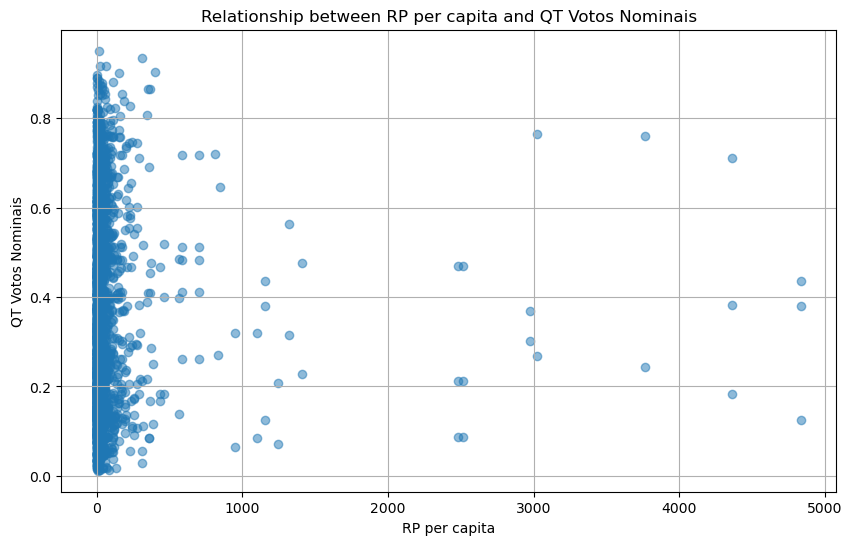

In [56]:
import matplotlib.pyplot as plt

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(merged_pop['RP per capita'], merged_pop['QT_VOTOS_NOMINAIS'], alpha=0.5)
plt.title('Relationship between RP per capita and QT Votos Nominais')
plt.xlabel('RP per capita')
plt.ylabel('QT Votos Nominais')
plt.grid(True)
plt.show()

In [73]:
# Calculate the correlation
correlation = merged_pop[['RP per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0, 1]
print(f"Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': {correlation}")

# Perform a linear regression to see the relationship
import statsmodels.api as sm

# Drop rows with NaN values in the relevant columns
cleaned_data = merged_pop.dropna(subset=['RP per capita', 'QT_VOTOS_NOMINAIS'])

# Define the independent variable (X) and the dependent variable (y)
X = cleaned_data[['RP per capita', 'Pop']]
y = cleaned_data['QT_VOTOS_NOMINAIS']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': 0.022048623491841546
                            OLS Regression Results                            
Dep. Variable:      QT_VOTOS_NOMINAIS   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     11.14
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.52e-05
Time:                        11:02:16   Log-Likelihood:                 469.66
No. Observations:                2866   AIC:                            -933.3
Df Residuals:                    2863   BIC:                            -915.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [61]:
grouped_by_uf = merged_pop.groupby('SG_UF')

# Plot the relationship for each state

# Calculate the correlation for each state
correlations = grouped_by_uf[['RP per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0::2, 1].reset_index(level=0)
correlations.columns = ['SG_UF', 'Correlation']

print(correlations.sort_values('Correlation', ascending=False))



              SG_UF  Correlation
RP per capita    AP     0.400554
RP per capita    GO     0.225363
RP per capita    TO     0.200075
RP per capita    PR     0.144058
RP per capita    AM     0.134440
RP per capita    RN     0.133108
RP per capita    AL     0.126744
RP per capita    RS     0.104025
RP per capita    SC     0.101343
RP per capita    RR     0.085059
RP per capita    BA     0.036763
RP per capita    SE     0.022684
RP per capita    MG     0.019809
RP per capita    PB     0.018927
RP per capita    PI     0.012687
RP per capita    PE     0.005292
RP per capita    SP     0.002385
RP per capita    MT    -0.026220
RP per capita    RJ    -0.042617
RP per capita    ES    -0.059349
RP per capita    CE    -0.064865
RP per capita    MS    -0.109819
RP per capita    MA    -0.139965
RP per capita    PA    -0.145792
RP per capita    RO    -0.150383
RP per capita    AC    -0.192086
RP per capita    DF          NaN


In [72]:
# Calculate the correlation
correlation = merged_pop[['Pago per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0, 1]
print(f"Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': {correlation}")

# Perform a linear regression to see the relationship
import statsmodels.api as sm

# Drop rows with NaN values in the relevant columns
cleaned_data = merged_pop.dropna(subset=['Pago per capita', 'QT_VOTOS_NOMINAIS'])

# Define the independent variable (X) and the dependent variable (y)
X = cleaned_data[['Pago per capita', 'Pop']]
y = cleaned_data['QT_VOTOS_NOMINAIS']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': -0.011149142148252448
                            OLS Regression Results                            
Dep. Variable:      QT_VOTOS_NOMINAIS   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.88
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.61e-07
Time:                        11:01:53   Log-Likelihood:                 836.02
No. Observations:                5023   AIC:                            -1666.
Df Residuals:                    5020   BIC:                            -1646.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [69]:
grouped_by_uf = merged_pop.groupby('SG_UF')

# Plot the relationship for each state

# Calculate the correlation for each state
correlations = grouped_by_uf[['Pago per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0::2, 1].reset_index(level=0)
correlations.columns = ['SG_UF', 'Correlation']

print(correlations.sort_values('Correlation', ascending=False))



                SG_UF  Correlation
Pago per capita    AL     0.144782
Pago per capita    PE     0.067094
Pago per capita    AM     0.059532
Pago per capita    SC     0.038509
Pago per capita    CE     0.037211
Pago per capita    SP     0.035044
Pago per capita    MA     0.029018
Pago per capita    MG     0.014411
Pago per capita    RS     0.001484
Pago per capita    GO    -0.000791
Pago per capita    RN    -0.015399
Pago per capita    PI    -0.017500
Pago per capita    RJ    -0.018617
Pago per capita    RR    -0.033299
Pago per capita    ES    -0.034914
Pago per capita    SE    -0.044997
Pago per capita    PR    -0.054853
Pago per capita    BA    -0.055259
Pago per capita    TO    -0.063059
Pago per capita    PB    -0.066581
Pago per capita    AC    -0.101672
Pago per capita    MS    -0.107326
Pago per capita    MT    -0.107766
Pago per capita    PA    -0.111711
Pago per capita    RO    -0.238568
Pago per capita    AP    -0.439752
Pago per capita    DF          NaN


In [74]:
# Calculate the correlation
correlation = merged_pop[['Empenhado per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0, 1]
print(f"Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': {correlation}")

# Perform a linear regression to see the relationship
import statsmodels.api as sm

# Drop rows with NaN values in the relevant columns
cleaned_data = merged_pop.dropna(subset=['Empenhado per capita', 'QT_VOTOS_NOMINAIS'])

# Define the independent variable (X) and the dependent variable (y)
X = cleaned_data[['Empenhado per capita', 'Pop']]
y = cleaned_data['QT_VOTOS_NOMINAIS']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

Correlation between 'Soma de RP Pago' and 'QT_VOTOS_NOMINAIS': -0.010724745519391263
                            OLS Regression Results                            
Dep. Variable:      QT_VOTOS_NOMINAIS   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.87
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.62e-07
Time:                        11:02:27   Log-Likelihood:                 979.27
No. Observations:                5916   AIC:                            -1953.
Df Residuals:                    5913   BIC:                            -1932.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [71]:
grouped_by_uf = merged_pop.groupby('SG_UF')

# Plot the relationship for each state

# Calculate the correlation for each state
correlations = grouped_by_uf[['Empenhado per capita', 'QT_VOTOS_NOMINAIS']].corr().iloc[0::2, 1].reset_index(level=0)
correlations.columns = ['SG_UF', 'Correlation']

print(correlations.sort_values('Correlation', ascending=False))



                     SG_UF  Correlation
Empenhado per capita    RR     0.228107
Empenhado per capita    AL     0.154570
Empenhado per capita    CE     0.142368
Empenhado per capita    PE     0.111053
Empenhado per capita    SC     0.080318
Empenhado per capita    RS     0.072260
Empenhado per capita    GO     0.063251
Empenhado per capita    PI     0.053334
Empenhado per capita    RJ     0.040038
Empenhado per capita    RN     0.017459
Empenhado per capita    MA     0.006393
Empenhado per capita    MG     0.001951
Empenhado per capita    AP    -0.000929
Empenhado per capita    TO    -0.001194
Empenhado per capita    BA    -0.003017
Empenhado per capita    PR    -0.004102
Empenhado per capita    SP    -0.008824
Empenhado per capita    ES    -0.033480
Empenhado per capita    PB    -0.081279
Empenhado per capita    MS    -0.093243
Empenhado per capita    MT    -0.098151
Empenhado per capita    AC    -0.105757
Empenhado per capita    PA    -0.110142
Empenhado per capita    AM    -0.114380


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Reshape X to be a DataFrame
X = merged_pop[['Empenhado per capita']]

# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame to display the results
mi_df = pd.DataFrame(mi, index=['Empenhado per capita'], columns=['Mutual Information'])
print(mi_df)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

: 